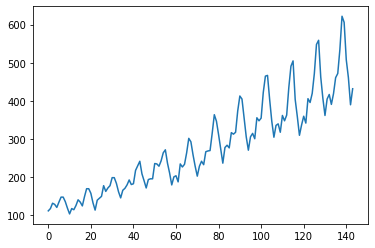

In [ ]:
import pandas
import matplotlib.pyplot as plt
dataset = pandas.read_csv('airline-passengers.csv', usecols=[1], engine='python')
plt.plot(dataset)
plt.show()

import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Performing LSTMs for univariate Time Series Forecasting


In [ ]:
# fix random seed for reproducibility
numpy.random.seed(7)


In [ ]:
# load the dataset
dataframe = pandas.read_csv('airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

The dataset airline-passengers and the code was taken form the https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/


LSTM is a recurrent neural network trained with backprop through time and overcomes the vanishing gradient problem. The block containes gates and memory state for recent sequences while the gates control the data in, saved and released from the memory state.

In [ ]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

The data is scaled to [0,1] using minmaxscaler as LSTM is sensitive to the scale of input data. The data is split into training and testing set as 67 and 33%.

In [ ]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


To create the dataset, we take in the dataset provided and the look_back which the numner of previous time steps to use as input variables to predic the next time period - here it's defaulted to 1. It creates a default dataset X with teh number of passangers at given time (t) and Y is the number of passangers at next time (t+1).


In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

Prepareing test and train datasets.

In [ ]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

LSTM expects data as [samples, time steps, features]. Here we have [samples, features], modifying it to get the shape needed to be used in LSTM model.

In [ ]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

The given network has 1 input, a hidden layer with 4 LSTM blocks and an output layer that gives a single prediction. Sigmoid function is used for the LSTM blocks and the netwwork is trained for 100 epochs and a batch size of 1 is used.

Epoch 1/100
94/94 - 0s - loss: 0.0477
Epoch 2/100
94/94 - 0s - loss: 0.0229
Epoch 3/100
94/94 - 0s - loss: 0.0180
Epoch 4/100
94/94 - 0s - loss: 0.0166
Epoch 5/100
94/94 - 0s - loss: 0.0155
Epoch 6/100
94/94 - 0s - loss: 0.0145
Epoch 7/100
94/94 - 0s - loss: 0.0134
Epoch 8/100
94/94 - 0s - loss: 0.0125
Epoch 9/100
94/94 - 0s - loss: 0.0115
Epoch 10/100
94/94 - 0s - loss: 0.0105
Epoch 11/100
94/94 - 0s - loss: 0.0095
Epoch 12/100
94/94 - 0s - loss: 0.0086
Epoch 13/100
94/94 - 0s - loss: 0.0077
Epoch 14/100
94/94 - 0s - loss: 0.0069
Epoch 15/100
94/94 - 0s - loss: 0.0061
Epoch 16/100
94/94 - 0s - loss: 0.0054
Epoch 17/100
94/94 - 0s - loss: 0.0047
Epoch 18/100
94/94 - 0s - loss: 0.0042
Epoch 19/100
94/94 - 0s - loss: 0.0038
Epoch 20/100
94/94 - 0s - loss: 0.0033
Epoch 21/100
94/94 - 0s - loss: 0.0030
Epoch 22/100
94/94 - 0s - loss: 0.0027
Epoch 23/100
94/94 - 0s - loss: 0.0025
Epoch 24/100
94/94 - 0s - loss: 0.0025
Epoch 25/100
94/94 - 0s - loss: 0.0023
Epoch 26/100
94/94 - 0s - loss: 0.

After fitting the model, we can estimate the performance of the model on the train and test datasets.

In [ ]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 23.11 RMSE
Test Score: 47.20 RMSE


Generating the predictions for train and test dataset

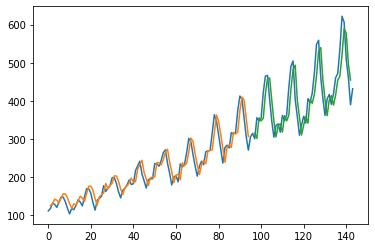

In [ ]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

While the lookback here is kept to 1, it can be increased for looking at multiple previous data to predict the next data to utilise the memory state function given by an LSTM.